# Searching for Boba: Analyzing Bubble Tea Shops in NYC Using the Yelp Fusion API

Mark Bauer

In [1]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from PIL import Image


In [2]:
df = pd.read_csv('boba-nyc.csv')

df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['pickup', 'delivery']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media3.fl.yelpcdn.com/bphoto/RzKMKS...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,58,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['pickup', 'delivery']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,28,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","['pickup', 'delivery']",$$,"{'address1': '23 Clinton St', 'address2': None...",NaN,NaN,1877.016204,40.720597,-73.984539,POINT (-73.984539 40.720597)
3,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,54,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","['pickup', 'delivery']",NaN,"{'address1': '32 Union Square E', 'address2': ...",1.646767e+10,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919100000001 40.735516)
4,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,83,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['pickup', 'delivery']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)


In [3]:
df.tail()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
391,QBebLBqhiuDlWasPgp6s4Q,tbaar-flushing-5,Tbaar,https://s3-media1.fl.yelpcdn.com/bphoto/bgao-b...,False,https://www.yelp.com/biz/tbaar-flushing-5?adju...,2,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",3.5,"{'latitude': 40.759357, 'longitude': -73.830396}","['delivery', 'pickup']",NaN,"{'address1': '135-52 Roosevelt Ave', 'address2...",NaN,NaN,15054.917573,40.759357,-73.830396,POINT (-73.83039599999999 40.759357)
392,Vz6hbICqQfyMWq9wzAKakw,tbaar-flushing-4,TBaar,https://s3-media1.fl.yelpcdn.com/bphoto/phUYWa...,False,https://www.yelp.com/biz/tbaar-flushing-4?adju...,6,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.0,"{'latitude': 40.7613116, 'longitude': -73.8308...",[],NaN,"{'address1': '37-11 Main St', 'address2': '', ...",NaN,NaN,15147.410738,40.761312,-73.830812,POINT (-73.8308122 40.7613116)
393,7apqk24GsFC9dptoD5dDZg,uncleman-cafe-new-york,Uncleman Cafe,NaN,False,https://www.yelp.com/biz/uncleman-cafe-new-yor...,1,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",1.0,"{'latitude': 40.71781, 'longitude': -73.99795}",[],NaN,"{'address1': '122 Mulberry St', 'address2': No...",1.212967e+10,(212) 966-6206,1414.238245,40.717810,-73.997950,POINT (-73.99795 40.71781)
394,YBgAPbviWYtVP2gAUhc7_A,t-baar-flushing,T Baar,https://s3-media4.fl.yelpcdn.com/bphoto/8pk-_Q...,False,https://www.yelp.com/biz/t-baar-flushing?adjus...,8,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",3.5,"{'latitude': 40.7587509, 'longitude': -73.830162}",[],$,"{'address1': '135-36 40th Rd', 'address2': '',...",NaN,NaN,15045.970192,40.758751,-73.830162,POINT (-73.830162 40.7587509)
395,f5UVQXvDpOrrIZdCjsw47w,maxins-cafe-flushing,Maxin's Cafe,https://s3-media1.fl.yelpcdn.com/bphoto/S3vWvD...,False,https://www.yelp.com/biz/maxins-cafe-flushing?...,15,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",3.5,"{'latitude': 40.7585, 'longitude': -73.83064}",[],$,"{'address1': '135-24 40th Rd', 'address2': '',...",1.718887e+10,(718) 886-9200,14997.842205,40.758500,-73.830640,POINT (-73.83064 40.7585)


In [4]:
df['name'].value_counts()

Kung Fu Tea                 26
Gong Cha                    23
Vivi Bubble Tea             19
Möge Tee                     9
CoCo Fresh Tea & Juice       6
                            ..
CoCo Fresh Tea And Juice     1
Sugarcube New York           1
Bobba Hubba                  1
Moge Tee Brooklyn            1
PaTea                        1
Name: name, Length: 258, dtype: int64

In [5]:
df['categories'][0]

"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]"

In [6]:
df['name'].value_counts().head(20)

Kung Fu Tea                    26
Gong Cha                       23
Vivi Bubble Tea                19
Möge Tee                        9
CoCo Fresh Tea & Juice          6
Tiger Sugar                     5
ViVi Bubble Tea                 5
TBaar                           4
Banhmigos                       4
Hawa Smoothies & Bubble Tea     4
Coco Fresh Tea & Juice          4
Chun Yang Tea                   4
Yaya Tea Garden                 3
Meet Fresh                      3
Tornado Crepe                   3
Mi Tea                          3
Teazzi Tea Shop                 3
Hanco's                         3
Jupioca                         3
Yifang Taiwan Fruit Tea         3
Name: name, dtype: int64

In [7]:
df.groupby(by='name')['review_count'].max().sort_values(ascending=False)

name
Tiger Sugar            739
Hanco's                702
Vivi Bubble Tea        658
Ten Ren's Tea Time     651
Mango Mango Dessert    618
                      ... 
Mitea forest hills       1
Chatime                  1
Uncleman Cafe            1
DIY POKE SUSHI II        1
Meno Tea And Coffee      1
Name: review_count, Length: 258, dtype: int64

In [8]:
df.groupby(by='name')['review_count'].mean().sort_values(ascending=False).astype(int)

name
Ten Ren's Tea Time      651
Hanco's                 517
Ajisen Ramen            431
Teado Tea Shop          423
520iFCha Dessert Bar    352
                       ... 
Hu's Teashop              1
Bubblion                  1
Uncleman Cafe             1
DIY POKE SUSHI II         1
Mitea forest hills        1
Name: review_count, Length: 258, dtype: int64

In [9]:
df.groupby(by='name')['rating'].mean().sort_values(ascending=False).astype(int)

name
Pig Pig Cafe             5
Boba Le Tea Cafe         5
Next Move Cafe           5
Coffee Story             5
DIY POKE SUSHI II        5
                        ..
Halo Kitchen & Lounge    2
C Fruit Life             2
Hu's Teashop             2
Chatime                  1
Uncleman Cafe            1
Name: rating, Length: 258, dtype: int64

top bubble tea businesses by review count:


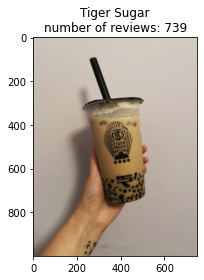

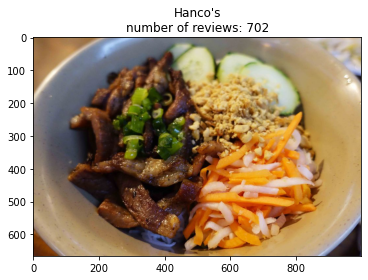

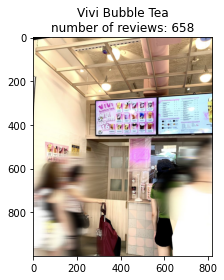

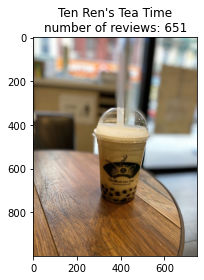

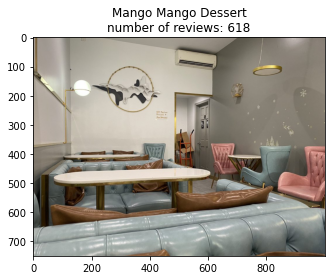

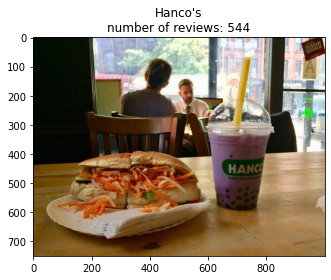

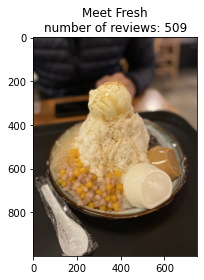

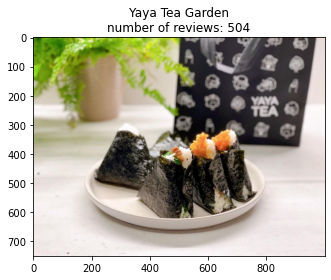

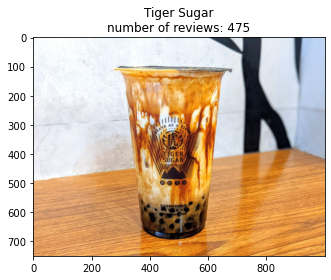

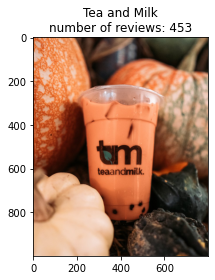

In [10]:
top_names = df.sort_values(by='review_count', ascending=False).head(10).index.to_list()
print('top bubble tea businesses by review count:')

for idx in top_names:
    plt.figure()
    
    url = df.iloc[idx]['image_url']
    title = df.iloc[idx]['name']
    reviews = df.iloc[idx]['review_count']

    im = Image.open(requests.get(url, stream=True).raw)
    plt.imshow(im)
    
    plt.title(title + '\nnumber of reviews: {}'.format(reviews))
    plt.tight_layout()